In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import datetime as dt

In [4]:
df = pd.read_csv('HRDataset.csv')

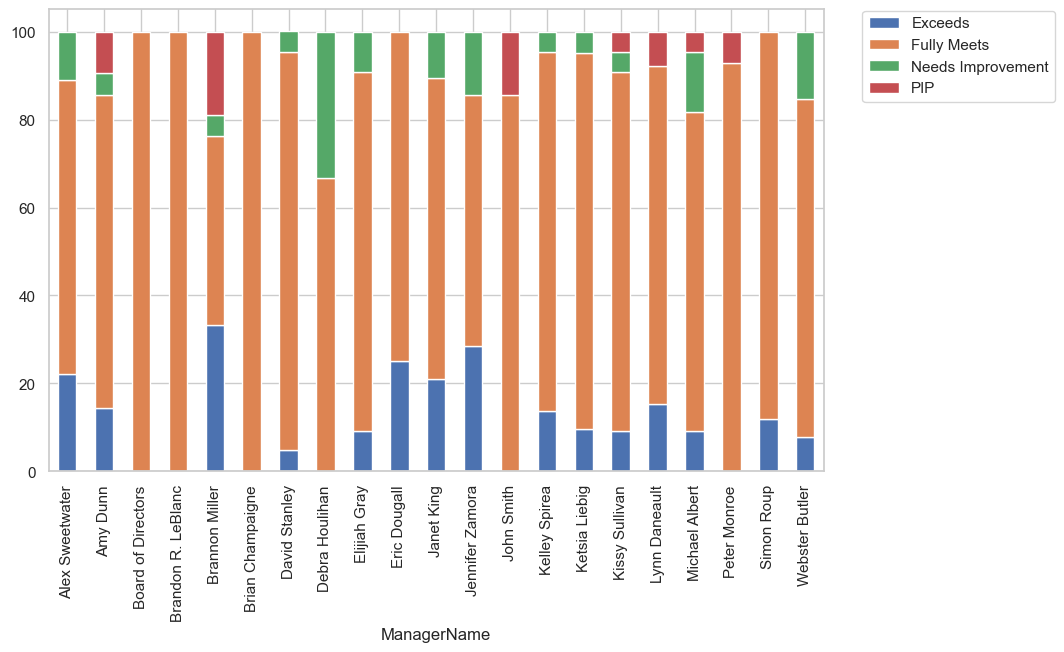

Porównując dane zawarte w wykresie, można zauważyć zależność pomiędzy oceną wydajności pracy (PerformanceScore) pracowników a tym, kto jest ich bezpośrednim przełożonym (ManagerName). 
Wszyscy pracownicy podlegający menadżerom Board of Directors, Brandon R. LeBlanc i Brian Champaigne otrzymują ocenę 'Fully Meets', co może oznaczać, że ci menadżerowie są mniej skłonni do nadawania innych ocen. 
W przypadku pozostałych menadżerów występuje większa różnorodność ocen, co sugeruje, że bardziej zwracają uwagę na różnice w wydajności między pracownikami.


In [73]:
#1
new_df = df.pivot_table(index=['ManagerName', 'ManagerID'], columns='PerformanceScore', values='EmpID', aggfunc='count').fillna(0)

new_df = new_df.groupby(level=0).sum()

percent_columns = ['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP']
new_df[percent_columns] = new_df[percent_columns].apply(lambda x: x / x.sum() * 100, axis=1).round(1)

sns.set(style="whitegrid")
new_df.plot(kind='bar', stacked=True, figsize = (10,6))
plt.legend(loc=(1.05,0.80))
plt.show()
print(f"Porównując dane zawarte w wykresie, można zauważyć zależność pomiędzy oceną wydajności pracy (PerformanceScore) pracowników a tym, kto jest ich bezpośrednim przełożonym (ManagerName). \nWszyscy pracownicy podlegający menadżerom Board of Directors, Brandon R. LeBlanc i Brian Champaigne otrzymują ocenę 'Fully Meets', co może oznaczać, że ci menadżerowie są mniej skłonni do nadawania innych ocen. \nW przypadku pozostałych menadżerów występuje większa różnorodność ocen, co sugeruje, że bardziej zwracają uwagę na różnice w wydajności między pracownikami.")

In [75]:
#2
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')


def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2023,10,15)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire']) / np.timedelta64(365, 'D')


df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

seniority_df = df.pivot_table(index=['RecruitmentSource'], values='EmpID', aggfunc='count').fillna(0)
seniority_df['Average_Seniority'] = df.groupby('RecruitmentSource')['Seniority'].mean().apply(round)
seniority_df

,EmpID,Average_Seniority
RecruitmentSource,,
Billboard,16,9
Careerbuilder,1,13
Company Intranet - Partner,1,1
Diversity Job Fair,29,6
Employee Referral,31,9
Glassdoor,14,6
Indeed,8,7
Information Session,4,9
Internet Search,6,7


In [76]:
seniority_df_filtered = seniority_df[seniority_df['EmpID'] > 9]
seniority_df_filtered

,EmpID,Average_Seniority
RecruitmentSource,,
Billboard,16,9
Diversity Job Fair,29,6
Employee Referral,31,9
Glassdoor,14,6
MBTA ads,17,9
Monster.com,24,7
Newspager/Magazine,18,8
On-campus Recruiting,12,9
Pay Per Click - Google,21,8


In [77]:
seniority_df_filtered_sorted = seniority_df_filtered.sort_values(by='Average_Seniority', ascending=False)
seniority_df_filtered_sorted

,EmpID,Average_Seniority
RecruitmentSource,,
Billboard,16,9
Employee Referral,31,9
MBTA ads,17,9
On-campus Recruiting,12,9
Professional Society,20,9
Website Banner Ads,13,9
Newspager/Magazine,18,8
Pay Per Click - Google,21,8
Monster.com,24,7


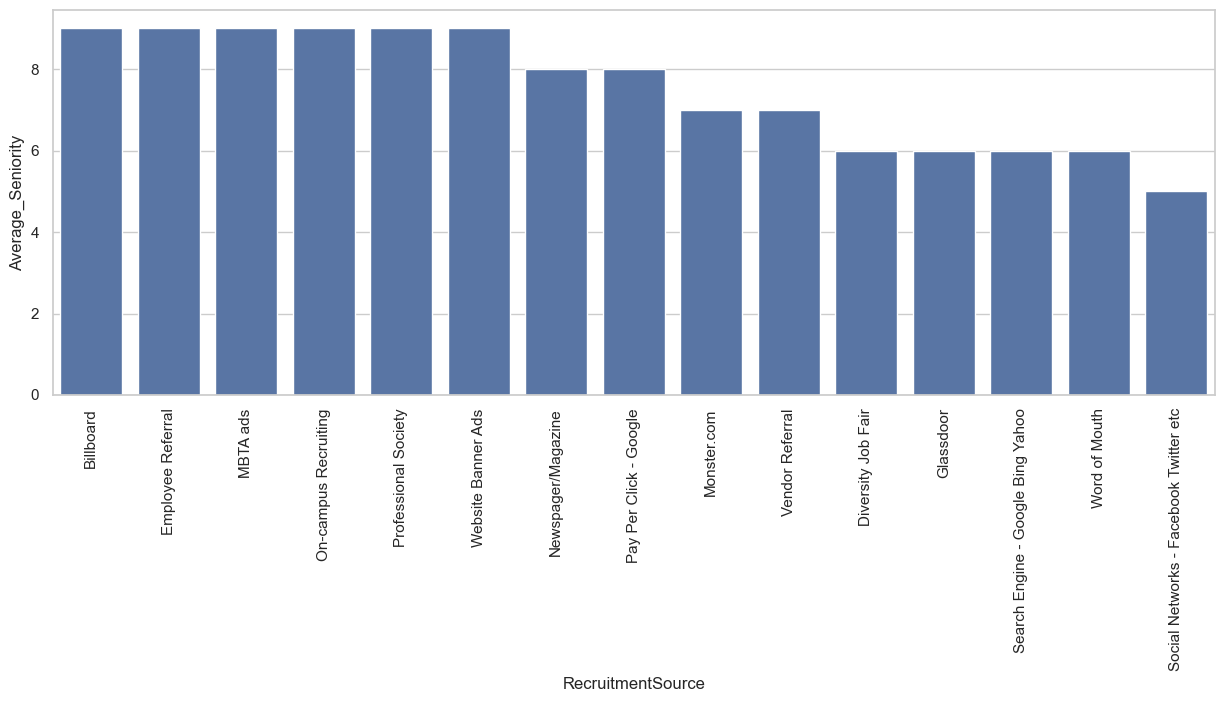

Jeśli zależy nam na jak najdłuższym stażu pracowników najlepszymi źródłami do rekrutacji są Billboard, Employee Referral, MBTA ads, On-campus Recruiting, Professional Society i Website Banner Ads.


In [78]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='RecruitmentSource', y='Average_Seniority', data=seniority_df_filtered_sorted)
plt.xticks(rotation=90)
plt.show()

print(f"Jeśli zależy nam na jak najdłuższym stażu pracowników najlepszymi źródłami do rekrutacji są Billboard, Employee Referral, MBTA ads, On-campus Recruiting, Professional Society i Website Banner Ads.")

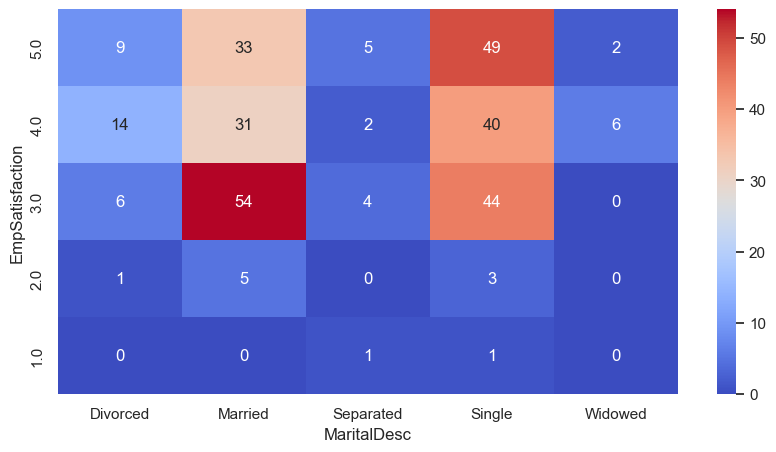

Na podstawie danych powyższej heatmapy można stwierdzić, że istnieje zależność między stanem cywilnym pracowników a poziomem zadowolenia z pracy. 
Najwyższy poziom zadowolenia z pracy występuje wśród pracowników stanu cywilnego 'Single', gdzie odnotowano największą ilość ocen na poziomie 5. 
W grupie 'Married' poziom zadowolenia jest niższy, z przewagą ocen na poziomie 3. 
W przypadku pozostałych grup stanu cywilnego, takich jak 'Divorced', 'Separated' i 'Widowed', poziomy zadowolenia również są niższe niż w przypadku stanu 'Single'.


In [79]:
#3
df2 = pd.crosstab(df['EmpSatisfaction'],df['MaritalDesc'])

plt.figure(figsize=(10, 5))
sns.heatmap(df2.iloc[::-1], annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.show()

print(f"Na podstawie danych powyższej heatmapy można stwierdzić, że istnieje zależność między stanem cywilnym pracowników a poziomem zadowolenia z pracy. \nNajwyższy poziom zadowolenia z pracy występuje wśród pracowników stanu cywilnego 'Single', gdzie odnotowano największą ilość ocen na poziomie 5. \nW grupie 'Married' poziom zadowolenia jest niższy, z przewagą ocen na poziomie 3. \nW przypadku pozostałych grup stanu cywilnego, takich jak 'Divorced', 'Separated' i 'Widowed', poziomy zadowolenia również są niższe niż w przypadku stanu 'Single'.")

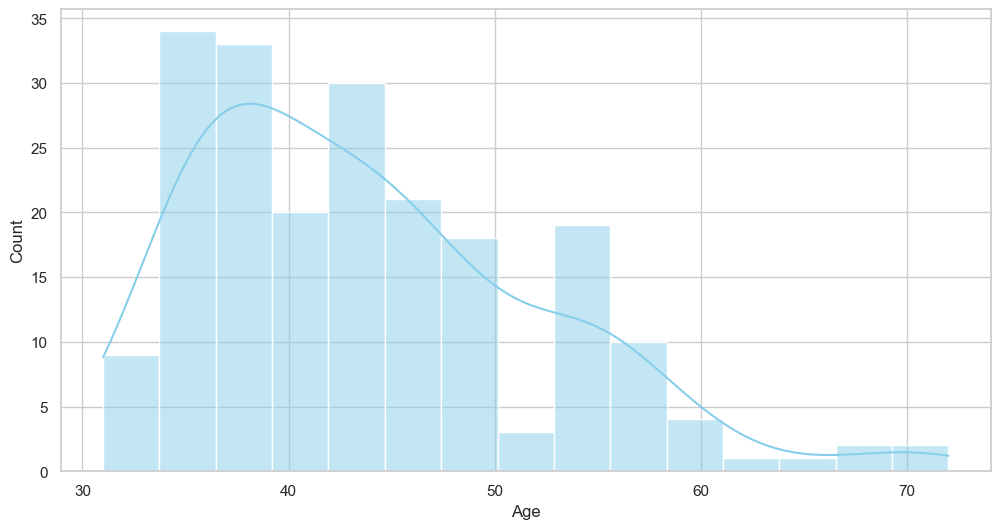

W strukturze wieku obecnych pracowników możemy dostrzec wyraźny wzrost liczby pracowników w wieku powyżej 30 lat, osiągając szczyt w okolicach 40 roku życia. Następnie liczba pracowników zaczyna stopniowo maleć, a najstarsi z nich mają około 70 lat.


In [80]:
#4
df['DOB'] = df['DOB'].apply(lambda date: date.replace(year=date.year - 100) if date.year > 2005 else date)

df['Age'] = dt.datetime.now().year - df['DOB'].dt.year

hire_df = df[df['DateofTermination'].isna()]

plt.figure(figsize=(12, 6))
sns.histplot(data=hire_df, x='Age', kde=True, bins=15, color='skyblue')
plt.show()

print(f"W strukturze wieku obecnych pracowników możemy dostrzec wyraźny wzrost liczby pracowników w wieku powyżej 30 lat, osiągając szczyt w okolicach 40 roku życia. Następnie liczba pracowników zaczyna stopniowo maleć, a najstarsi z nich mają około 70 lat.")

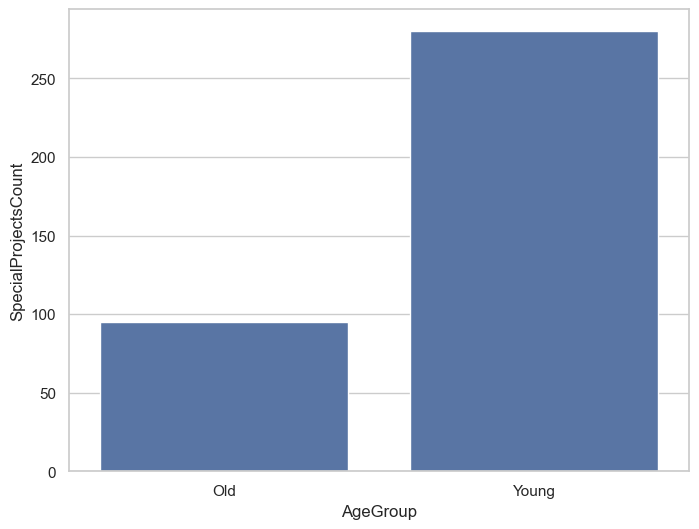

 Starsi pracownicy pracują nad znacznie mniejszą liczbą specjalnych projektów niż młodsi.


In [81]:
#5
threshold_age = 50
df['AgeGroup'] = df['Age'].apply(lambda age: 'Old' if age >= threshold_age else 'Young')

sp_df = df.groupby('AgeGroup')['SpecialProjectsCount'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='SpecialProjectsCount', data=sp_df)
plt.show()

print(f" Starsi pracownicy pracują nad znacznie mniejszą liczbą specjalnych projektów niż młodsi.")